In [1]:
# Fix imports when running from notebooks/ folder
import sys
from pathlib import Path

project_root = Path.cwd().parent 
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

print(f"Added to path: {project_root}")

%load_ext autoreload
%autoreload 2

Added to path: /Users/elshaday/DEV/10Academy/credit-risk-probability-week4


In [23]:
from src import DataManager
from scripts.constants import NUMERIC_COLS, Columns,CATEGORY_COLS
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

### 1. Raw Data Understanding

In [3]:
# Initiate Data Manager Instance

dm = DataManager()
raw_df = dm.load_csv()

Loading ../data/raw/raw_data.csv...
Sucessfully loaded ../data/raw/raw_data.csv!


In [4]:
print("1. Overview of Data")
raw_df.info()


1. Overview of Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15 

In [5]:
print("2. Statistics Summary")

raw_df.describe()

2. Statistics Summary


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [6]:
print("3. Distribution of Numeric Columns")
numeric_df = raw_df[NUMERIC_COLS]


3. Distribution of Numeric Columns


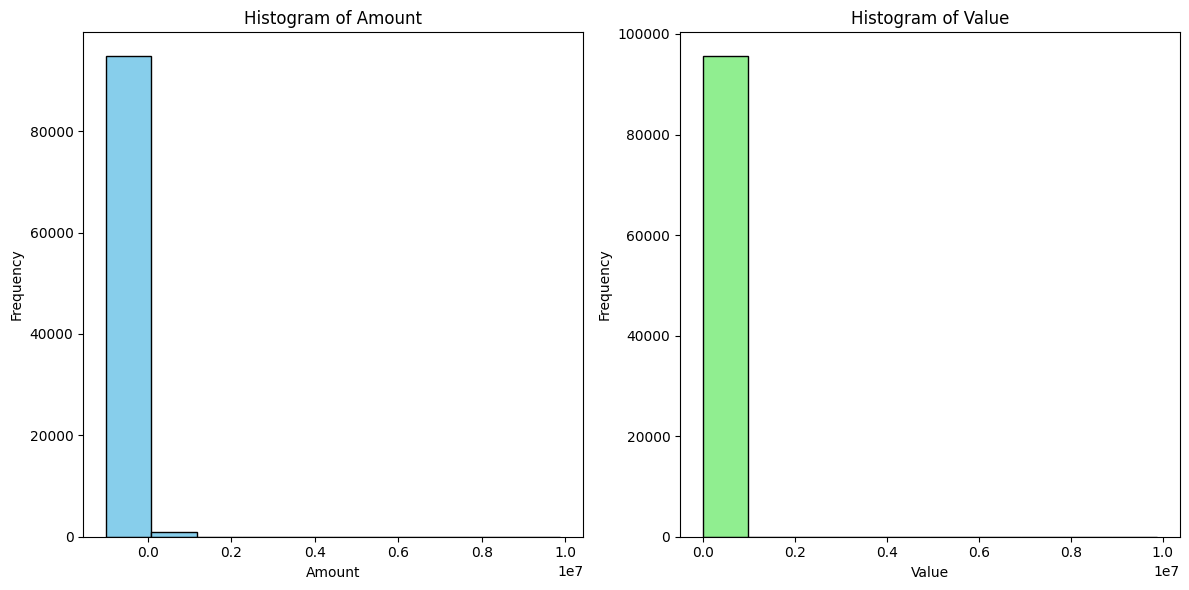

In [7]:
# Histogram for Distribution
fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Amount Histogram
axes[0].hist(numeric_df[Columns.Amount.value], bins=10, color='skyblue', edgecolor='black')
axes[0].set_title('Histogram of Amount')
axes[0].set_xlabel('Amount')
axes[0].set_ylabel('Frequency')


# Value Histogram
axes[1].hist(
    numeric_df[Columns.Value.value], bins=10, color="lightgreen", edgecolor="black"
)
axes[1].set_title("Histogram of Value")
axes[1].set_xlabel("Value")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

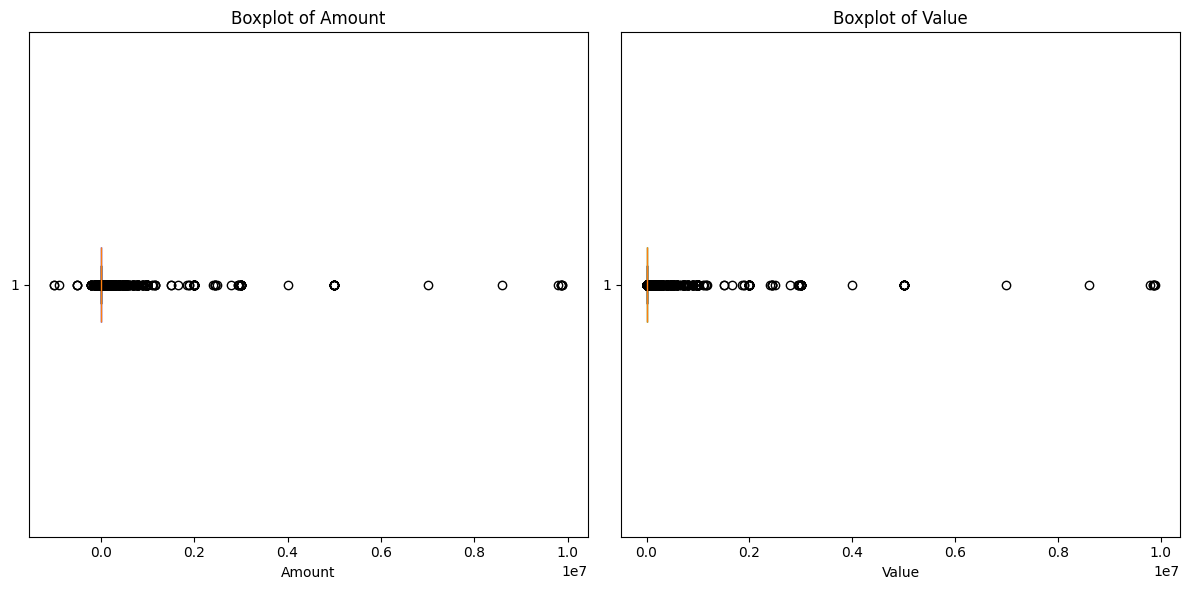

In [8]:
# Box Plot for Outlier Detection
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Amount Box Plot
axes[0].boxplot(
    numeric_df[Columns.Amount.value],
    vert=False,
    patch_artist=True,
    boxprops=dict(facecolor="lightblue", color="blue"),
)
axes[0].set_title("Boxplot of Amount")
axes[0].set_xlabel("Amount")

# Value Box Plot
axes[1].boxplot(
    numeric_df[Columns.Value.value],
    vert=False,
    patch_artist=True,
    boxprops=dict(facecolor="lightgreen", color="green"),
)
axes[1].set_title("Boxplot of Value")
axes[1].set_xlabel("Value")

plt.tight_layout()
plt.show()

In [18]:
print("4. Distribution of Categorical Columns")
categorical_df = raw_df[CATEGORY_COLS]

4. Distribution of Categorical Columns


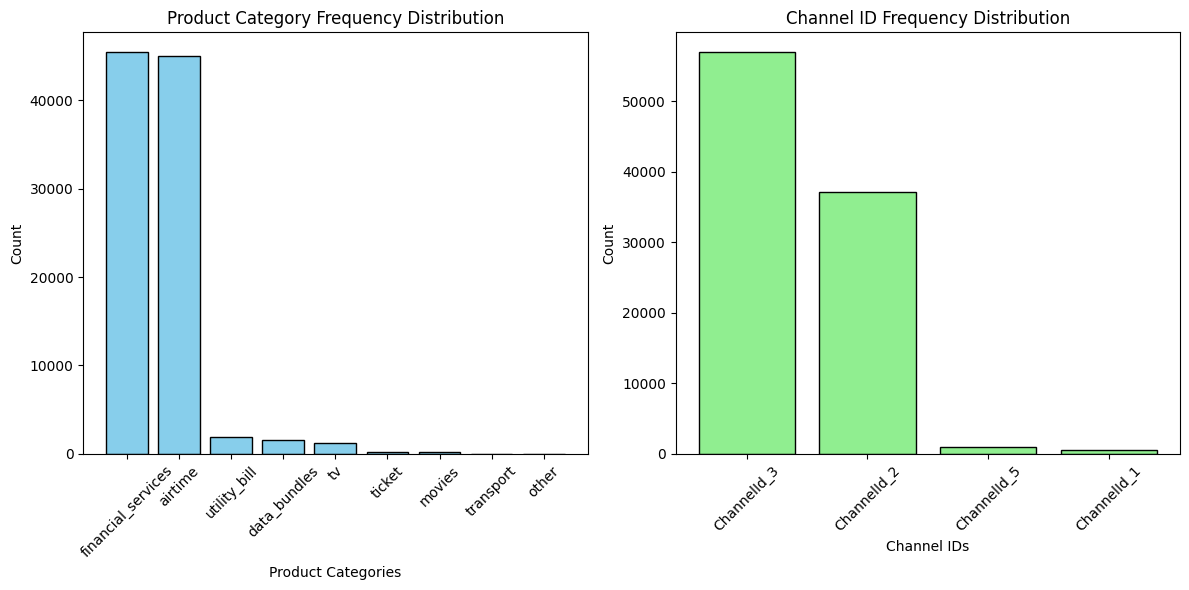

In [15]:
# Bar Chart for Product Category Dominance

prod_category_counts = categorical_df[Columns.ProductCategory.value].value_counts()
fig, axes = plt.subplots(1,2, figsize=(12,6))

# Product Category Bar Chart
axes[0].bar(
    prod_category_counts.index.astype(str),
    prod_category_counts.values,
    color="skyblue",
    edgecolor="black",
)
axes[0].set_title('Product Category Frequency Distribution')
axes[0].set_xlabel("Product Categories")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=45)


# Channel ID Bar Chart
channel_id_counts = categorical_df[Columns.ChannelId.value].value_counts()
axes[1].bar(
    channel_id_counts.index.astype(str),
    channel_id_counts.values,
    color="lightgreen",
    edgecolor="black",
)
axes[1].set_title("Channel ID Frequency Distribution")
axes[1].set_xlabel("Channel IDs")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

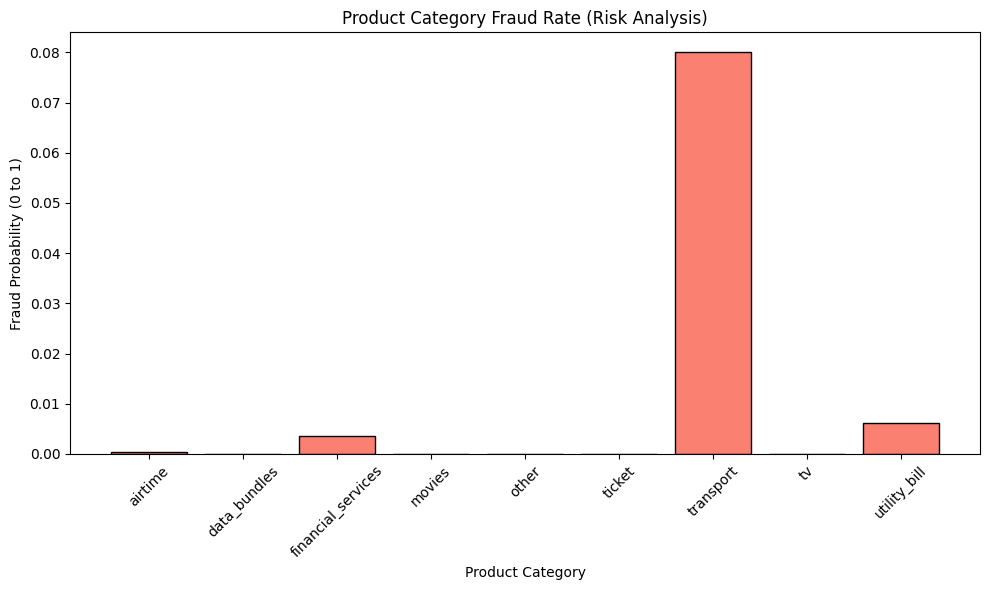

In [17]:
# Which Product Category is most risky

risk_stats = raw_df.groupby(Columns.ProductCategory.value)[Columns.FraudResult.value].mean()

fig, ax = plt.subplots(figsize=(10, 6))  

ax.bar(
    risk_stats.index.astype(str), risk_stats.values, color="salmon", edgecolor="black"
)

ax.set_title(f"Product Category Fraud Rate (Risk Analysis)")
ax.set_xlabel("Product Category")
ax.set_ylabel("Fraud Probability (0 to 1)")
ax.tick_params(axis="x", rotation=45)

plt.tight_layout()  
plt.show()

5. Correlation Analysis


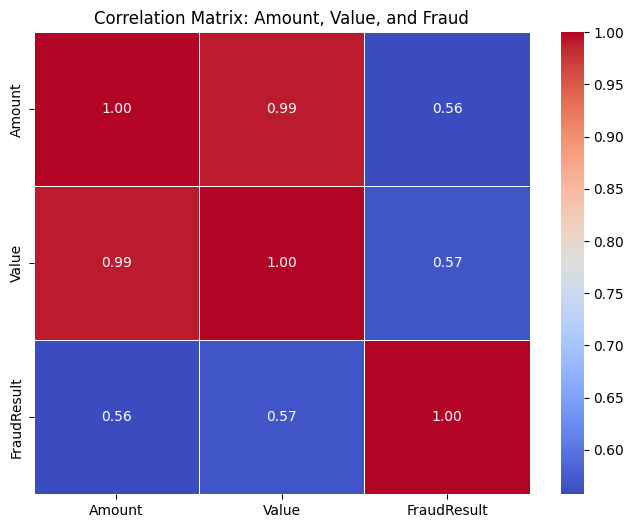

In [21]:
print("5. Correlation Analysis")

corr_cols = NUMERIC_COLS + [Columns.FraudResult.value]

corr_matrix = raw_df[corr_cols].corr()

plt.figure(figsize=(8,6))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix: Amount, Value, and Fraud')
plt.show()


In [25]:
print("6. Missing Value Detection")

print(tabulate(raw_df.isna().sum().to_frame(), headers=["Column", "Missing Value Count"], tablefmt="grid"))

6. Missing Value Detection
+----------------------+-----------------------+
| Column               |   Missing Value Count |
+======================+=======================+
| TransactionId        |                     0 |
+----------------------+-----------------------+
| BatchId              |                     0 |
+----------------------+-----------------------+
| AccountId            |                     0 |
+----------------------+-----------------------+
| SubscriptionId       |                     0 |
+----------------------+-----------------------+
| CustomerId           |                     0 |
+----------------------+-----------------------+
| CurrencyCode         |                     0 |
+----------------------+-----------------------+
| CountryCode          |                     0 |
+----------------------+-----------------------+
| ProviderId           |                     0 |
+----------------------+-----------------------+
| ProductId            |                  

### **Breif Analysis of Raw Data Findings**

## Numeric Columns:

*Amount*:
- Central Tendency: The mean (6.717846e+03) is greater than the 50% (1.000000e+03) which shows the data is Right Skewed with high values pulling the average up (log transformation needed)
- Dispersion: std (1.233068e+05) > mean (6.717846e+03) showing High dispersion (tightly clustered)
- Outliers: The maximum value (9.880000e+06) is greater than the 75% (2.800000e+03) which shows data contains massive outliers 

*Value*:
- Central Tendency: The mean (9.900584e+03) is significantly greater than the 50% (1.000000e+03) which shows the data is Right Skewed with high values pulling the average up (log transformation needed)
- Dispersion: std (1.231221e+05) > mean (9.900584e+03) showing High dispersion
- Outliers: The maximum value (9.880000e+06) is greater than the 75% (5.000000e+03) which shows there are outliers in the data 

*Fraud Result*:
- Fraud rate of raw data is 0.2%

Correlation of Numeric Values: From our heatmap we can see that `Amount` and `Value` have a correlation of `0.99` which effectivley means they have very similar values. Dropping one of them may be a good idea. `Amount` and `Fraud Result` have a moderatley positive correlation of `0.57` meaning that as the amounts get higher, the transaction gets riskier.

*Country Code*:
- Has 0 std which means all values are same `256` and has no variance. This column does not give us any information about the data and our model training better off by dropping this column.


## Categorical Columns:

*Product Category*: Financial Services and airtime dominate the data set showing that a significant majority of transactions are made as payments for these services

*Channel ID*: The primary channels used in the data set are Channel ID 3 and Channel ID 2. Although it is unclear what type of channels they are, it could help us in identifying via which channel frauds occur etc.


Lastly, it is shown that most frauds happen under the `transport` product category. 

## Missing Values

The dataframe shows all columns have 95662 non-null values.

